In [67]:
import pandas as pd
import zipfile
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2
import urllib

### Set filepath for unzipped data

In [68]:
FILEPATH = "../data/unzipped/train/"

### Create a dataframe with the name and label of each entry in the unzipped entries

In [69]:
train_set = pd.DataFrame({"image": os.listdir("../data/unzipped/train")})
train_set["label"] = train_set["image"].apply(lambda x: x.split(".")[0])#.replace({'dog': 1, 'cat':0})

train_set = train_set.sample(frac=1)

train_set.reset_index(drop=True, inplace=True)

train_set

,image,label
0,dog.11343.jpg,dog
1,dog.10951.jpg,dog
2,dog.1144.jpg,dog
3,dog.7836.jpg,dog
4,dog.2829.jpg,dog
...,...,...
24995,cat.630.jpg,cat
24996,cat.3828.jpg,cat
24997,cat.2671.jpg,cat
24998,cat.7697.jpg,cat


### Visualize the class imbalance if any

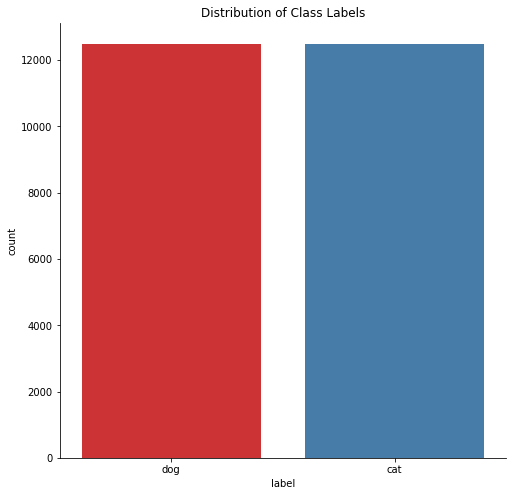

In [70]:
fig, ax = plt.subplots(figsize = (8, 8))

sns.countplot(x = "label", palette="Set1", data = train_set, ax = ax)

ax.set_title("Distribution of Class Labels")
sns.despine()
plt.show()

### Create our training data

In [73]:
training_data = []

for index, row in train_set.iterrows():
    image = row['image']
    label = row['label']
    filepath = FILEPATH + "/" + image
    image_array = cv2.imread(filepath, 0)
    image_array = cv2.resize(image_array, (100,100))
    training_data.append([image, image_array, label])

### Split training data into X and y

In [74]:
images = []
X = []
y = []

for image, feature, label in training_data:
    images.append(image)
    X.append(feature)
    y.append(label)

In [75]:
X = np.array(X)

### Reshape X for use in Conv2D

In [81]:
X = np.array(X).reshape(-1,100,100,1)

In [82]:
X.shape

(25000, 100, 100, 1)

In [83]:
pickle_out = open("../pickles/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("../pickles/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_out = open("../pickles/images.pickle","wb")
pickle.dump(images, pickle_out)
pickle_out.close()

## Read image from url

In [2]:
import pickle

In [84]:
model = pickle.load(open("../pickles/model.pickle", "rb"))

In [107]:
url = "https://static.toiimg.com/thumb/msid-67586673,width-800,height-600,resizemode-75,imgsize-3918697,pt-32,y_pad-40/67586673.jpg"

In [108]:
def load_from_web(image_url):
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, 0) # 'Load it as it is'
    img = cv2.resize(img, (100,100))
    
    return img/255

In [109]:
img = load_from_web(url)

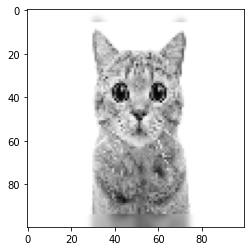

In [110]:
plt.imshow(img, cmap="gray")

In [103]:
new_img = img.reshape(-1,100,100,1)

In [104]:
model.predict(new_img)

array([[0.09719539]], dtype=float32)